# NAPAC Beam + Laser Interactions w. FACET E320 parameters
Uses xsuite and xcain to model an easy drift system with a laser interaction. Starts with simple drift and adds a head-on laser interaction.

In [6]:
import sys
import importlib
import os
from scipy.constants import c, hbar, pi
import xtrack as xt
import xobjects as xo
import xplt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mpl_scatter_density  
from decimal import Decimal
from cpymad.madx import Madx
from scipy import stats
import pickle
from matplotlib.colors import LinearSegmentedColormap, to_rgba

In [7]:
from E320_parameters import *

In [8]:
# Add xcain module path
home_dir = '/sdf/home/m/muntingf/Desktop/xcain/'
sys.path.insert(0, os.path.abspath(home_dir))
from xcain import laser_interaction as xc
beamline_dir = '/sdf/home/m/muntingf/Desktop/FACET-II Beamline/'

In [9]:
# Define laser interaction IP
laser_interaction_elem = xc.LaserInteraction(name='e320_laser',           
                                             # change for your path                                  
                                             cain_path = home_dir+'cain_executable/cain_compiled.gcc',
                                             laser_parameter=LASER_PARAMETERS,
                                             seed=1993,
                                            #  is_on=True, # Default is True, can be turned off, to be tested
                                            photon_file='photons.hdf',
                                             part_file='particles.hdf'
                                             )

In [10]:
# Select number of particles
npart = int(n_macro)

# Generate a particle distribution for the line defined before 
# Gaussian Beam
x_dist = np.random.normal(0, sigma_e_x, npart) # m
px_dist = np.random.normal(0, sigma_xp, npart) # rad
y_dist = np.random.normal(0, sigma_e_y, npart) # m
py_dist = np.random.normal(0, sigma_yp, npart) # rad
zeta_dist = np.random.normal(0, 30e-6, npart) # m
delta_dist = np.random.normal(0, 0.01, npart) # dimensionless

## Sanity check: only drift elements.
To check everything is fine and dandy, let's start with a single drift element and see what happens to the phase space diagram. We expect a stretching.

In [11]:
# Dictionary containing the elements of the xtrack line
elements_dict = {
    'drift.1': xt.Drift(length=5)
}

# Build the line
line = xt.Line(elements=elements_dict,
               element_names=['drift.1']) # This defines the order of the elements in the line
            #    element_names=['laser_interaction']) # This defines the order of the elements in the line

# Build the tracker
line.build_tracker()


# Define reference particle related to the line 
line.particle_ref = xt.Particles(p0c=beam_energy_MeV*1e6, q0=1, mass0=xt.ELECTRON_MASS_EV)


# Select number of particles
npart = int(n_macro)

# Generate a particle distribution for the line defined before 
# Gaussian Beam
x_dist = np.random.normal(0, sigma_e_x, npart) # m
px_dist = np.random.normal(0, sigma_xp, npart) # rad
y_dist = np.random.normal(0, sigma_e_y, npart) # m
py_dist = np.random.normal(0, sigma_yp, npart) # rad

## Square beam
# x_dist = np.random.uniform(-10e-6, 10e-6, npart) # rad
# px_dist = np.random.uniform(-10e-6, 10e-6, npart) # rad
# y_dist = np.random.uniform(-10e-6, 10e-6, npart) # m
# py_dist = np.random.uniform(-10e-6, 10e-6, npart) # rad

zeta_dist = np.random.normal(0, 30e-6, npart) # m
delta_dist = np.random.normal(0, 0.01, npart) # dimensionless

no_laser_particles = line.build_particles(
            num_particles=npart,
            particle_ref=line.particle_ref,

            ## Beam parameters
            x = x_dist, px = px_dist, y = y_dist, py = py_dist, zeta = zeta_dist, delta = delta_dist)
particles=no_laser_particles

In [12]:
# # # Plot initial distribution in transverse (horizontal) phase space as an example
# fig, ax = plt.subplots()

# # ax.scatter(particles.x, particles.px)
# ax.hist2d(particles.x, particles.px, bins=50)

# ax.set_xlabel('x [m]')
# ax.set_ylabel('px [rad]')
# ax.annotate('beam energy {} GeV'.format(beam_energy_MeV/10**3),
#              xy=(1, 0), xycoords='axes fraction',
#             xytext=(-20, 5), textcoords='offset pixels',
#             horizontalalignment='right',
#             color='black',
#             verticalalignment='bottom')

# plt.show()

In [13]:
# # Plot initial distribution in transverse (horizontal) phase space as an example
# fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
# fig.suptitle("Tracking particles after drift", fontsize=20)
# ax1.scatter(particles.x, particles.px, alpha=0.5, label='Initial')
# ax2.scatter(particles.y, particles.py, alpha=0.5, label='Initial')

# ax1.set_xlabel('x [m]')
# ax1.set_ylabel('px [rad]')
# ax2.set_xlabel('y [m]')
# ax2.set_ylabel('py [rad]')

# # Track the particles through the line
# line.track(particles)

# ax1.scatter(particles.x, particles.px, color='purple', marker='.', label='Final')
# ax2.scatter(particles.y, particles.py, color='purple', marker='.', label='Final')
# ax1.legend()
# ax2.legend()
# fig.tight_layout()
# # plt.savefig("E320_parameters_drift.png")

## Adding laser interaction

In [14]:
# # Dictionary containing the elements of the xtrack line
# elements_dict = {
#     'drift.1': xt.Drift(length=5),
#     'laser_interaction': laser_interaction_elem
# }

# # Build the line
# line = xt.Line(elements=elements_dict,
#                element_names=['drift.1', 'laser_interaction']) # This defines the order of the elements in the line
#             #    element_names=['laser_interaction']) # This defines the order of the elements in the line

# # Build the tracker
# line.build_tracker()


# # Define reference particle related to the line 
# line.particle_ref = xt.Particles(p0c=beam_energy_MeV*1e6, q0=1, mass0=xt.ELECTRON_MASS_EV)


# ##
# # Select number of particles
# npart = int(n_macro)

# # Generate a particle distribution for the line defined before
# particles = line.build_particles(
#             # _capacity=2*npart,
#             num_particles=npart,
#             particle_ref=line.particle_ref,

#             ## Gaussian beam
#             x = np.random.normal(0, sigma_e_x, npart), # m
#             px = np.random.normal(0, sigma_xp, npart), # rad
#             y = np.random.normal(0, sigma_e_y, npart), # m
#             py = np.random.normal(0, sigma_yp, npart), # rad

#             ## Square beam
#             # x = np.random.uniform(-10e-6, 10e-6, npart), # m
#             # px = np.random.uniform(-10e-6, 10e-6, npart), # rad
#             # y = np.random.uniform(-10e-6, 10e-6, npart), # m
#             # py = np.random.uniform(-10e-6, 10e-6, npart), # rad
    
#             zeta = np.random.normal(0, 30e-6, npart), # m
#             delta = np.random.normal(0, 0.01, npart)) # dimensionless

In [15]:
# # Plot initial distribution in transverse (horizontal) phase space as an example
# fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
# fig.suptitle("Tracking particles after drift + laser", fontsize=20)
# ax1.scatter(particles.x, particles.px, alpha=0.5, label='Initial')
# ax2.scatter(particles.y, particles.py, alpha=0.5, label='Initial')

# ax1.set_xlabel('x [m]')
# ax1.set_ylabel('px [rad]')
# ax2.set_xlabel('y [m]')
# ax2.set_ylabel('py [rad]')

# # Track the particles through the line
# line.track(particles)

# ax1.scatter(particles.x, particles.px, color='purple', marker='.', label='Final')
# ax2.scatter(particles.y, particles.py, color='purple', marker='.', label='Final')
# ax1.legend()
# ax2.legend()

# ax2.annotate('laser pulse energy {} J'.format(EXAMPLE_LASER_PARAMETER['pulseE']),
#              xy=(1, 0), xycoords='axes fraction',
#             xytext=(-20, 5), textcoords='offset pixels',
#             horizontalalignment='right',
#             verticalalignment='bottom')
# ax2.annotate('beam energy {} GeV'.format(beam_energy_MeV/10**3),
#              xy=(1, 0), xycoords='axes fraction',
#             xytext=(-20, 20), textcoords='offset pixels',
#             horizontalalignment='right',
#             verticalalignment='bottom')
# fig.tight_layout()

## Only laser interaction

In [16]:
# Dictionary containing the elements of the xtrack line
elements_dict = {
    # 'drift.1': xt.Drift(length=5)
    # ,
    'laser_interaction': laser_interaction_elem
}

# Build the line
line = xt.Line(elements=elements_dict,
               element_names=[
                   'laser_interaction'
                   # ,
                   #             'drift.1'
                             ]) # This defines the order of the elements in the line
            #    element_names=['laser_interaction']) # This defines the order of the elements in the line

# Build the tracker
line.build_tracker()


# Define reference particle related to the line 
line.particle_ref = xt.Particles(p0c=beam_energy_MeV*1e6, q0=1, mass0=xt.ELECTRON_MASS_EV)


##
# Select number of particles
npart = int(n_macro)

# Generate a particle distribution for the exact same distribution of particles as before (new ref. particle)
particles = line.build_particles(
            num_particles=npart,
            particle_ref=line.particle_ref,

            ## Beam Params
            x = x_dist, px = px_dist, y = y_dist, py = py_dist,

            zeta = zeta_dist, delta = delta_dist)

Text(0.5, 1.1, 'Laser Interaction')

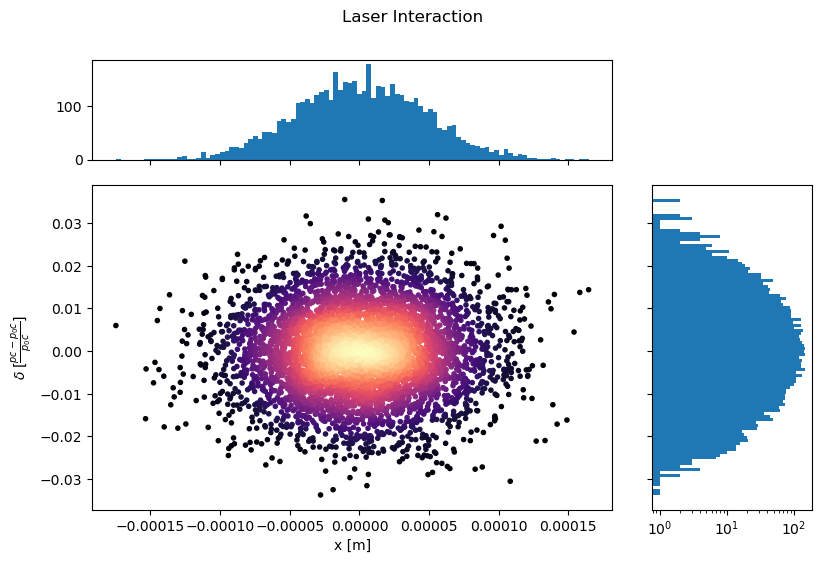

In [17]:

# Data
x = particles.x
y = particles.delta
axes_names = [r'x [m]', r'$\delta\; [\frac{pc-p_0c}{p_0c}]$']
bins = 100

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 5))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# Histograms
axHistx.hist(x, bins=bins)
axHistx.tick_params(axis="x",labelbottom=False)

axHisty.hist(y, bins=bins, orientation='horizontal')
axHisty.tick_params(axis="y",labelleft=False)
axHisty.set_xscale('log')

# Alpha coloring for scatter plot
values = np.vstack([x,y])
kernel = stats.gaussian_kde(values)
weights = kernel(values)
weights = weights/weights.max()

# Scatter plot:
axScatter.scatter(x, y, marker='.', c=weights, cmap='magma')
axScatter.set_xlim(axHistx.get_xlim())
axScatter.set_xlabel(axes_names[0])
axScatter.set_ylabel(axes_names[1])
axScatter.set_ylim(axHisty.get_ylim())

plt.suptitle('Laser Interaction', y=1.1)
# plt.tight_layout()
# plt.savefig('laser+drift_delta_vs_x.png', bbox_inches='tight', dpi = 100)

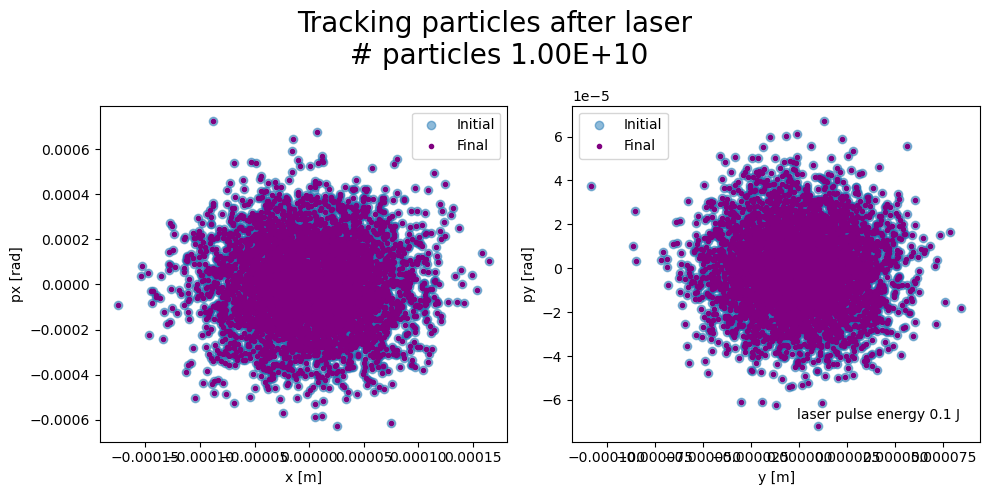

In [18]:
plz_save=np.array(y)
plz_save_x=np.array(x)
# Plot initial distribution in transverse (horizontal) phase space as an example
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
fig.suptitle("Tracking particles after laser\n # particles %.2E"% Decimal(n_electrons), fontsize=20)
ax1.scatter(particles.x, particles.px, alpha=0.5, label='Initial')
ax2.scatter(particles.y, particles.py, alpha=0.5, label='Initial')

ax1.set_xlabel('x [m]')
ax1.set_ylabel('px [rad]')
ax2.set_xlabel('y [m]')
ax2.set_ylabel('py [rad]')

# Track the particles through the line
line.track(particles)

ax1.scatter(particles.x, particles.px, color='purple', marker='.', label='Final')
ax2.scatter(particles.y, particles.py, color='purple', marker='.', label='Final')
ax1.legend()
ax2.legend()

ax2.annotate('laser pulse energy {} J'.format(LASER_PARAMETERS['pulseE']),
             xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
fig.tight_layout()
# plt.savefig("laser_interaction")

# Laser+drift 

In [19]:
# # Dictionary containing the elements of the xtrack line
# elements_dict = {
#     'drift.1': xt.Drift(length=5)
#     # ,
#     # 'laser_interaction': laser_interaction_elem
# }
# line = xt.Line(elements=elements_dict,
#                element_names=[
#                    # 'laser_interaction'
#                    # , 
#                    'drift.1'
#                              ]) # This defines the order of the elements in the line

# # Build the tracker
# line.build_tracker()
# line.discard_tracker()
# line.insert_element('laser_interaction', element=laser_interaction_elem, at_s=0)
# line.build_tracker()

# # Define reference particle related to the line 
# line.particle_ref = xt.Particles(p0c=beam_energy_MeV*1e6, q0=1, mass0=xt.ELECTRON_MASS_EV)


# ##
# # Select number of particles
# npart = int(n_macro)

# # Generate a particle distribution for the exact same distribution of particles as before (new ref. particle)
# particles = line.build_particles(
#             num_particles=npart,
#             particle_ref=line.particle_ref,

#             ## Beam Params
#             x = x_dist, px = px_dist, y = y_dist, py = py_dist,

#             zeta = zeta_dist, delta = delta_dist)

In [20]:

# # Plot initial distribution in transverse (horizontal) phase space as an example
# fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
# fig.suptitle("Tracking particles after laser + drift", fontsize=20)
# ax1.scatter(particles.x, particles.px, alpha=0.5, label='Initial')
# ax2.scatter(particles.y, particles.py, alpha=0.5, label='Initial')

# ax1.set_xlabel('x [m]')
# ax1.set_ylabel('px [rad]')
# ax2.set_xlabel('y [m]')
# ax2.set_ylabel('py [rad]')

# # Track the particles through the line

# line.track(particles)

# ax1.scatter(particles.x, particles.px, color='purple', marker='.', label='Final')
# ax2.scatter(particles.y, particles.py, color='purple', marker='.', label='Final')
# ax1.legend()
# ax2.legend()

# ax2.annotate('laser pulse energy {} J'.format(LASER_PARAMETERS['pulseE']),
#              xy=(1, 0), xycoords='axes fraction',
#             xytext=(-20, 20), textcoords='offset pixels',
#             horizontalalignment='right',
#             verticalalignment='bottom')
# fig.tight_layout()
# # plt.savefig("E320_parameters_laser+drift.png")

# 2D Histograms

Text(0.5, 1.1, 'Laser Interaction \n # particles 1.00E+10')

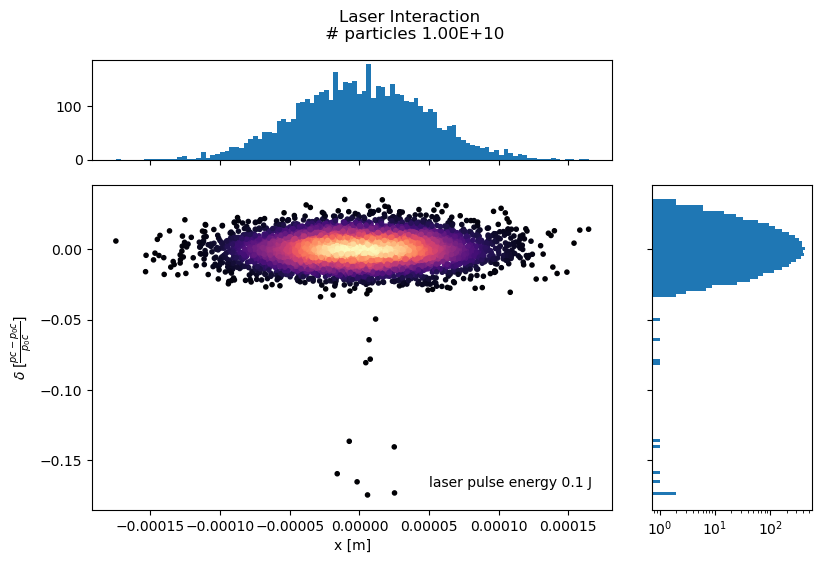

In [21]:
# Data
x = particles.x
y = particles.delta
axes_names = [r'x [m]', r'$\delta\; [\frac{pc-p_0c}{p_0c}]$']
bins = 100

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 5))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# Histograms
axHistx.hist(x, bins=bins)
axHistx.tick_params(axis="x",labelbottom=False)

axHisty.hist(y, bins=bins, orientation='horizontal')
axHisty.tick_params(axis="y",labelleft=False)
axHisty.set_xscale('log')

# Alpha coloring for scatter plot
values = np.vstack([x,y])
kernel = stats.gaussian_kde(values)
weights = kernel(values)
weights = weights/weights.max()

# Scatter plot:
axScatter.scatter(x, y, marker='.', c=weights, cmap='magma')
axScatter.set_xlim(axHistx.get_xlim())
axScatter.set_xlabel(axes_names[0])
axScatter.set_ylabel(axes_names[1])
axScatter.set_ylim(axHisty.get_ylim())
axScatter.annotate('laser pulse energy {} J'.format(LASER_PARAMETERS['pulseE']),
             xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

plt.suptitle('Laser Interaction \n # particles %.2E'% Decimal(n_electrons), y=1.1)
# plt.tight_layout()
# plt.savefig('laser_delta_vs_x.png', bbox_inches='tight', dpi = 100)

In [22]:
# import corner
# import pandas as pd
# N = 10000
# D = 2

# def plot_with_corner(data: pd.DataFrame):
#     fig = corner.corner(
#         data,
#         smooth=0.9,
#         label_kwargs=dict(fontsize=30),
#         title_kwargs=dict(fontsize=16),
#         truth_color="tab:orange",
#         plot_density=False,
#         plot_datapoints=False,
#         max_n_ticks=3,
#         verbose=False,
#         use_math_text=True,
#     )
#     # plt.savefig("corner.png")

In [23]:
# fig = plt.figure(figsize=(10,10))
# plt.suptitle('After Laser Interaction')
# x = particles.x
# y = particles.px
# plot_dict = {'x [m]': x,
#             'px [rad]': y}
# corner.corner(data=plot_dict, bins=100, fig=fig);
# fig = plt.figure(figsize=(10,10))
# plt.suptitle('Before Laser Interaction')
# x = no_laser_particles.x
# y = no_laser_particles.px
# plot_dict = {'x [m]': x,
#             'px [rad]': y}
# corner.corner(data=plot_dict, bins=100, fig=fig);

In [24]:
num_momentum_change=len(np.where(plz_save-y>0.03)[0])
momenta_idx = np.where(plz_save-y>0.03)[0]
num_momentum_change

10

In [25]:
# Max momentum change
max(np.abs(y-plz_save))
weight=n_electrons/n_macro
num_scattered=num_momentum_change*weight
print('%.2E scattered electrons with momentum change > 3 percent' % Decimal(num_scattered))

2.00E+07 scattered electrons with momentum change > 3 percent


In [26]:
len(np.where(plz_save-y==0.0)[0])

4

# FACET Beamline Interaction

In [61]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

In [62]:
# Retrieving picnic basket locations (ie. laser locations)
with open('../../../FACET-II Beamline/picnicbasket_loc.pkl', 'rb') as f:
    picnic_locs = pickle.load(f)

In [63]:
# --- Load MAD-X file ---
mad = Madx()
mad.call(beamline_dir+"LI20_modifiedMadX.xsif")

# --- Expand FF20H beamline ---
mad.input("""
USE, PERIOD=FF20H;
""")

FF20H_line = xt.Line.from_madx_sequence(mad.sequence.FF20H)



  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.09.03  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2024.04.25               +
  + Execution date: 2025.07.31 13:59:41      +
  ++++++++++++++++++++++++++++++++++++++++++++


! *** OPTICS=FACET2-16FEB24 ***



! ==============================================================================

! FACET e- optics

! ------------------------------------------------------------------------------

! 19-JUN-2025, C. Munting

!  * Converted file from Mad8/xsif to MadX to import beamlines into Xsuite.

!  * Changes: appending ';' on each line. SBEN-->SBEND, TILT with no value --> TILT=pi/4, etc. All documented with comments.

! ------------------------------------------------------------------------------

! ------------------------------------------------------------------------------

! 17-DEC-2021, M. Woodley

!  * change WIGE "_full" definitions for Bmad translation per C. Mayes

! 04

Converting sequence "ff20h":   0%|          | 0/143 [00:00<?, ?it/s]

In [64]:
# Choose the line
line = FF20H_line
line_name = 'FF20H Line'
measurement_loc='wdsotr'
# measurement_loc=1
# With or without laser interaction
with_laser = True

# Define reference particle related to the line
if line_name in picnic_locs and with_laser:
    line.insert_element('laser', element=laser_interaction_elem, at_s=picnic_locs[line_name]) # At picnic basket location
line.cycle(name_first_element='laser', inplace=True)
line.particle_ref = xt.Particles(p0c=beam_energy_MeV*1e6, q0=1, mass0=xt.ELECTRON_MASS_EV)
line.build_tracker()
# Select number of particles
npart = int(n_macro)

# Generate a particle distribution for the exact same distribution of particles as before (new ref. particle)
particles = line.build_particles(
            num_particles=npart,
            particle_ref=line.particle_ref,
            ## Beam Params
            x = x_dist, px = px_dist, y = y_dist, py = py_dist,

            zeta = zeta_dist, delta = delta_dist)

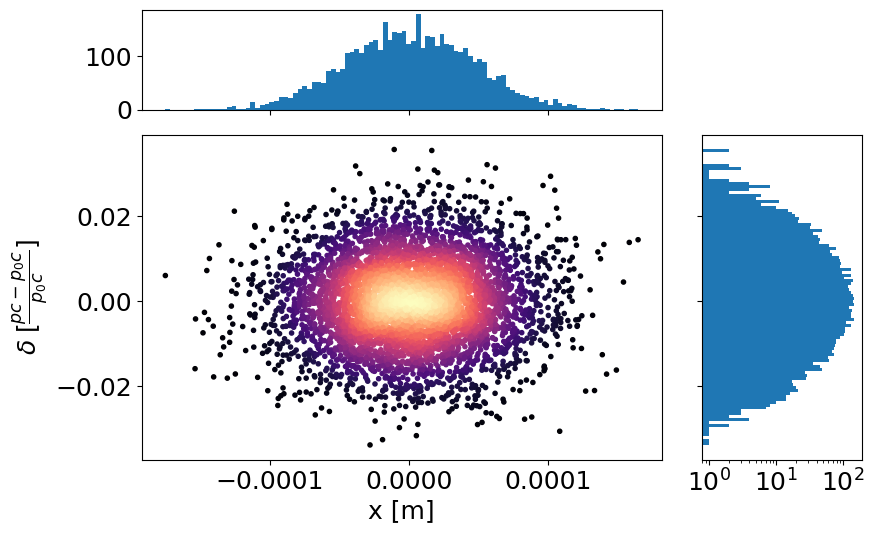

In [65]:
# Data
x = particles.x
y = particles.delta
axes_names = [r'x [m]', r'$\delta\; [\frac{pc-p_0c}{p_0c}]$']
bins = 100

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 5))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# Histograms
axHistx.hist(x, bins=bins)
axHistx.tick_params(axis="x",labelbottom=False)

axHisty.hist(y, bins=bins, orientation='horizontal')
axHisty.tick_params(axis="y",labelleft=False)
axHisty.set_xscale('log')

# Alpha coloring for scatter plot
values = np.vstack([x,y])
kernel = stats.gaussian_kde(values)
weights = kernel(values)
weights = weights/weights.max()

# Scatter plot:
axScatter.scatter(x, y, marker='.', c=weights, cmap='magma')
axScatter.set_xlim(axHistx.get_xlim())
axScatter.set_xlabel(axes_names[0])
axScatter.set_ylabel(axes_names[1])
axScatter.set_ylim(axHisty.get_ylim())

# plt.suptitle('Laser Interaction', y=1.1)
# plt.tight_layout()
# plt.savefig('laser+drift_delta_vs_x.png', bbox_inches='tight', dpi = 100)

init_data = {
    'x': np.array(particles.x),
    'y': np.array(particles.y),
    'delta': np.array(particles.delta),
    'px' :np.array(particles.px),
    'py' : np.array(particles.py)
    }

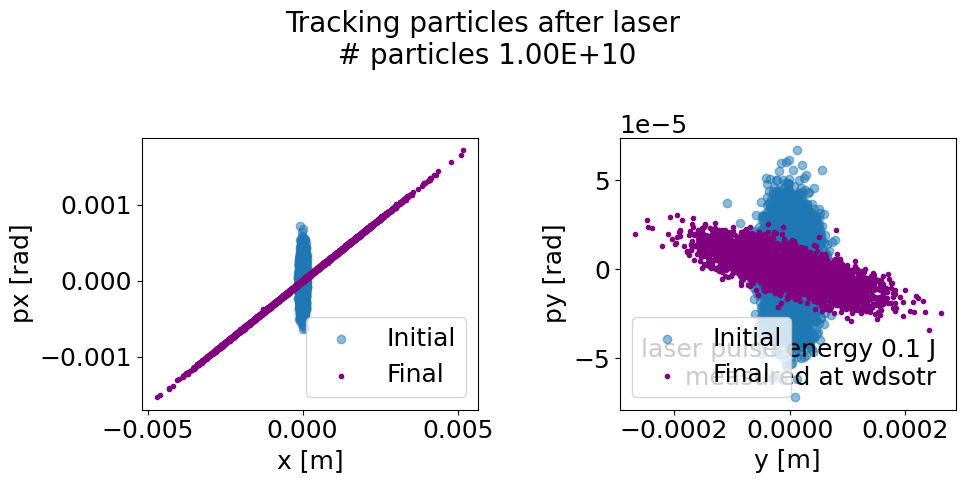

In [66]:
# Plot initial distribution in transverse (horizontal) phase space as an example
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
fig.suptitle("Tracking particles after laser\n # particles %.2E"% Decimal(n_electrons), fontsize=20)
ax1.scatter(particles.x, particles.px, alpha=0.5, label='Initial')
ax2.scatter(particles.y, particles.py, alpha=0.5, label='Initial')

ax1.set_xlabel('x [m]')
ax1.set_ylabel('px [rad]')
ax2.set_xlabel('y [m]')
ax2.set_ylabel('py [rad]')

# Track the particles through the line
line.track(particles, ele_stop=measurement_loc)

ax1.scatter(particles.x, particles.px, color='purple', marker='.', label='Final')
ax2.scatter(particles.y, particles.py, color='purple', marker='.', label='Final')
ax1.legend()
ax2.legend()

ax2.annotate('laser pulse energy {} J\n measured at {}'.format(LASER_PARAMETERS['pulseE'], measurement_loc),
             xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
fig.tight_layout()
# plt.savefig("laser_interaction")

(-0.18719518901371796, 0.04614066773946841)

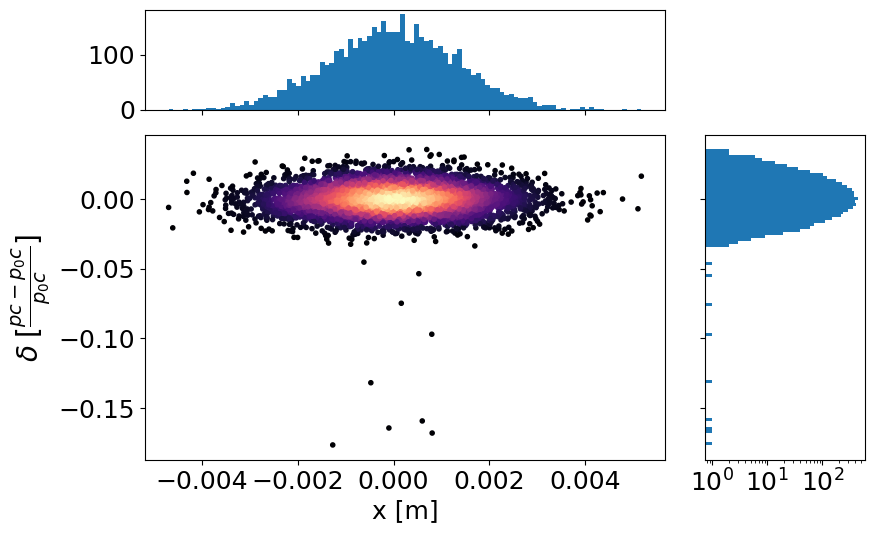

In [67]:
# Data
x = particles.x
y = particles.delta
axes_names = [r'x [m]', r'$\delta\; [\frac{pc-p_0c}{p_0c}]$']
bins = 100

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 5))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# Histograms
axHistx.hist(x, bins=bins)
axHistx.tick_params(axis="x",labelbottom=False)

axHisty.hist(y, bins=bins, orientation='horizontal')
axHisty.tick_params(axis="y",labelleft=False)
axHisty.set_xscale('log')

# Alpha coloring for scatter plot
values = np.vstack([x,y])
kernel = stats.gaussian_kde(values)
weights = kernel(values)
weights = weights/weights.max()

# Scatter plot:
axScatter.scatter(x, y, marker='.', c=weights, cmap='magma')
axScatter.set_xlim(axHistx.get_xlim())
axScatter.set_xlabel(axes_names[0])
axScatter.set_ylabel(axes_names[1], fontsize=20)
axScatter.set_ylim(axHisty.get_ylim())
# axScatter.annotate('laser pulse energy {} J'.format(LASER_PARAMETERS['pulseE'], measurement_loc),
#              xy=(1, 0), xycoords='axes fraction',
#             xytext=(-20, 20), textcoords='offset pixels',
#             horizontalalignment='right',
#             verticalalignment='bottom')

# plt.suptitle('Laser Interaction \n # particles %.2E'% Decimal(n_electrons), y=1.1)
# plt.tight_layout()
# plt.savefig('laser_delta_vs_x.png', bbox_inches='tight', dpi = 100)

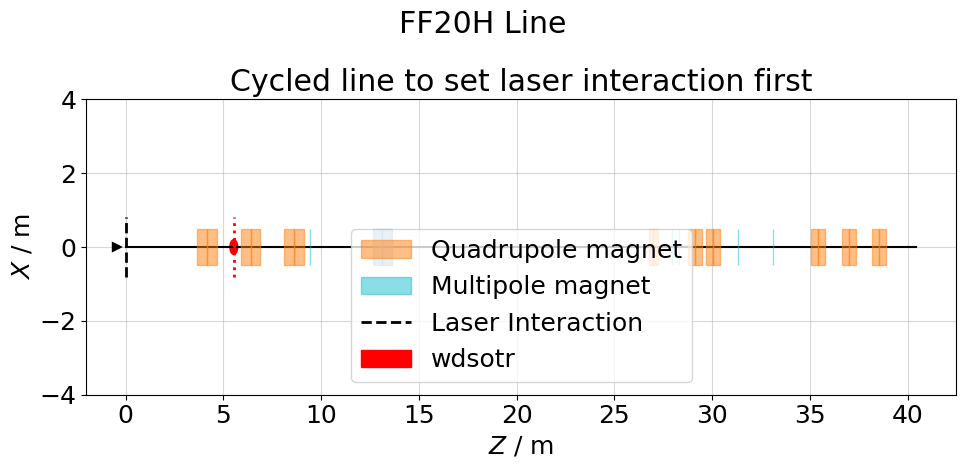

In [68]:
# line.survey().plot()
fig, ax = plt.subplots(figsize=(10, 5))
survey = line.survey()
plot = xplt.FloorPlot(survey, ax=ax)  # Pass your custom axes
plot.title(line_name, y=0.95)
ax.set_ylim(-4, 4)
ax.set_aspect('auto')
ax.set_title('Cycled line to set laser interaction first')

# Annotate each element with its name
for i, (el_name, z, el_type) in enumerate(zip(survey['name'], survey['Z'], survey['element_type'])):
    if el_name=='wdsotr': 
         ax.axvline(x=z, ls=':',lw=2,c='red', ymin=.4, ymax=.6)
         circle1=plt.Circle((z, 0), 0.2, color='red', label='wdsotr')
         ax.add_patch(circle1)
    if el_type == 'Drift' or (el_type =='Marker' and el_name!='wdsotr'): continue
    if el_name == 'laser':
        ax.axvline(x=z, ls='--',lw=2,c='black', ymin=.4, ymax=.6, label='Laser Interaction')
plot.legend()
fig.tight_layout()

In [96]:
# Max momentum change
print(max(np.abs(y-init_data['delta'])))
weight=n_electrons/n_macro
num_momentum_change=len(np.where(init_data['delta']-y>0.03)[0])
momenta_idx = np.where(init_data['delta']-y>0.03)[0]
non_affected_idx=np.where(init_data['delta']-y<=0.03)[0]
num_momentum_change
num_scattered=num_momentum_change*weight
print('%.2E scattered electrons with energy change > 3 percent\n' % Decimal(num_scattered))

# Max percent tranverse momentum change based on energy change
change_dict = {'px_change': particles.px-init_data['px'], 'py_change': particles.py-init_data['py']}
for key, val in zip(change_dict.keys(), change_dict.values()):
    affected = np.mean(val[momenta_idx])
    non_affected = np.mean(val[non_affected_idx])
    print('average {} for collided {}'.format(key,affected))
    print('average {} for non-collided {}'.format(key, non_affected))

0.18329790090250064
2.00E+07 scattered electrons with energy change > 3 percent

average px_change for collided -1.6972701067107155e-05
average px_change for non-collided -1.4287279596426044e-06
average py_change for collided 1.3496582559046317e-06
average py_change for non-collided 5.285841797048781e-07


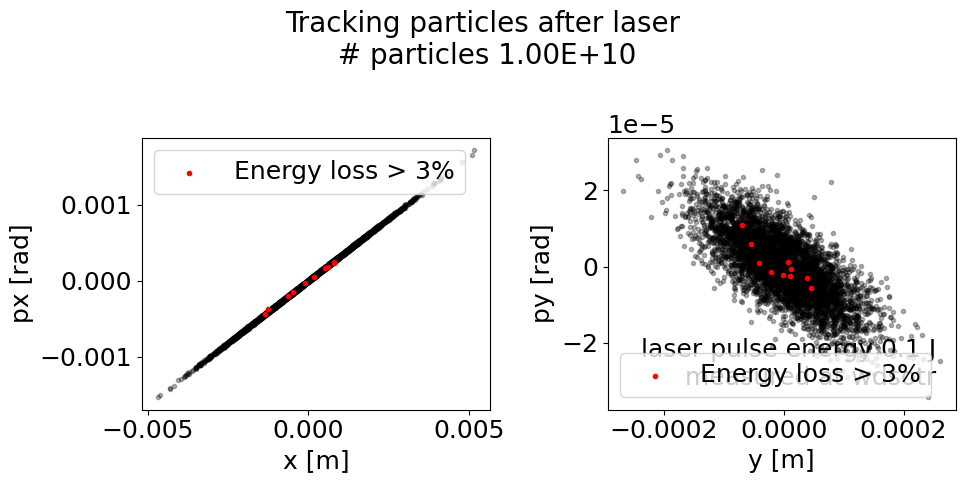

In [70]:
# Plot initial distribution in transverse (horizontal) phase space as an example
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
fig.suptitle("Tracking particles after laser\n # particles %.2E"% Decimal(n_electrons), fontsize=20)


ax1.set_xlabel('x [m]')
ax1.set_ylabel('px [rad]')
ax2.set_xlabel('y [m]')
ax2.set_ylabel('py [rad]')
ax1.scatter(particles.x, particles.px, color='black', marker='.', alpha=0.3)
ax2.scatter(particles.y, particles.py, color='black', marker='.', alpha=0.3)


ax1.scatter(particles.x[momenta_idx], particles.px[momenta_idx], color='red', marker='.', label='Energy loss > 3%')
ax2.scatter(particles.y[momenta_idx], particles.py[momenta_idx], color='red', marker='.', label='Energy loss > 3%')
ax1.legend()
ax2.legend()
ax2.annotate('laser pulse energy {} J\n measured at {}'.format(LASER_PARAMETERS['pulseE'], measurement_loc),
             xy=(1, 0), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
fig.tight_layout()
# plt.savefig("laser_interaction")

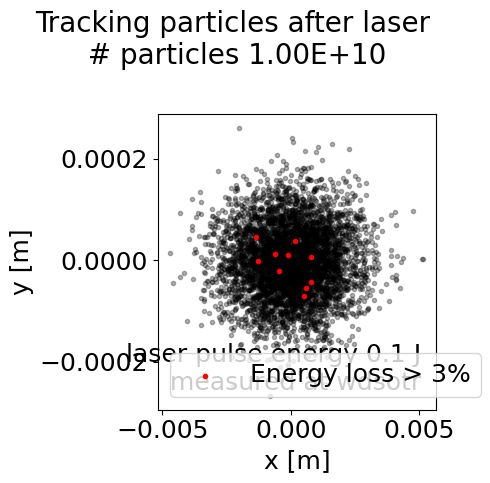

In [71]:
# Plot initial distribution in transverse (horizontal) phase space as an example
fig, ax1 = plt.subplots(1, 1,figsize=(5, 5))
fig.suptitle("Tracking particles after laser\n # particles %.2E"% Decimal(n_electrons), fontsize=20)

ax1.set_xlabel('x [m]')
ax1.set_ylabel('y [m]')
ax1.scatter(particles.x, particles.y, color='black', marker='.', alpha=0.3)

ax1.scatter(particles.x[momenta_idx], particles.y[momenta_idx], color='red', marker='.', label='Energy loss > 3%')
ax1.legend()
ax1.annotate('laser pulse energy {} J\n measured at {}'.format(LASER_PARAMETERS['pulseE'], measurement_loc),
             xy=(1, 0), xycoords='axes fraction',
            xytext=(-15, 15), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
fig.tight_layout()
# plt.savefig("pos_vs_energyloss.png")

# Twiss parameters and survey plots

The line has collective elements.
In the twiss computation collective elements are replaced by drifts
wdsotr is at z =  5.529999999999999


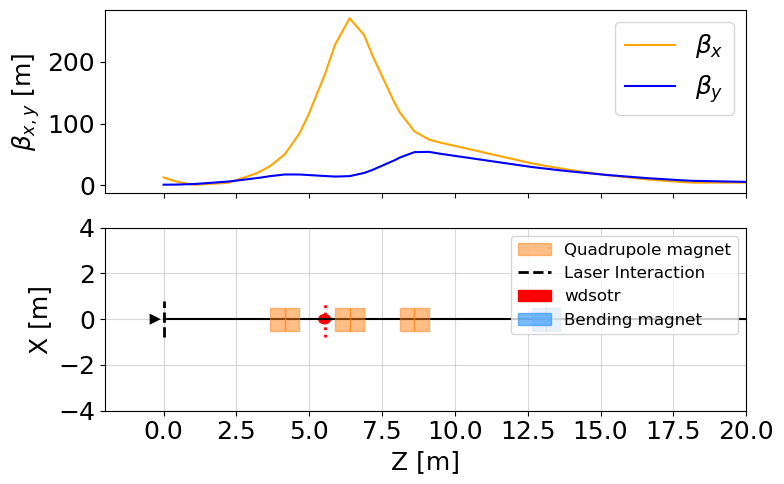

In [43]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,5), sharex=True)
line.discard_tracker()
line.remove_inactive_multipoles() # Remove pesky 'multipole' things that don't do anything
survey = line.survey()
tw = line.twiss(method='4d') # RF cavities are not included in lattice so 'longitudinal motion is not stable'. Use 'method=4d' in this case. https://xsuite.readthedocs.io/en/latest/twiss.html#d-method-rf-off
# Beta functions
ax1.plot(tw.s, tw.betx, label=r'$\beta_x$',c='orange')
ax1.plot(tw.s, tw.bety, label=r'$\beta_y$', c='blue')
ax1.legend()
ax1.set_xlim(right=20)
# ax1.set_ylim(top=100, bottom=0)

ax1.set_ylabel(r'$\beta_{x,y}$ [m]')

# Lattice survey plot
plot = xplt.FloorPlot(survey, ax=ax2)  # Pass your custom axes
ax2.set_ylim(-4, 4)
ax2.set_xlim(right=20)
ax2.set_aspect('auto')
otr_loc=0

plt.rcParams.update({'font.size': 12})
# Annotate each element with its name
for i, (el_name, z, el_type) in enumerate(zip(survey['name'], survey['Z'], survey['element_type'])):
    if el_name=='wdsotr': 
         ax2.axvline(x=z, ls=':',lw=2,c='red', ymin=.4, ymax=.6)
         circle1=plt.Circle((z, 0), 0.2, color='red', label='wdsotr')
         ax2.add_patch(circle1)
         otr_loc=z
         print('wdsotr is at z = ', otr_loc)
    if el_type == 'Drift' or (el_type =='Marker' and el_name!='wdsotr'): continue
    if el_name == 'laser':
        ax2.axvline(x=z, ls='--',lw=2,c='black', ymin=.4, ymax=.6, label='Laser Interaction')
    
circle2=plt.Circle((z, 0), 0.2, color='dodgerblue', label='Bending magnet', alpha=0.6)
ax2.add_patch(circle2)
ax2.set_ylabel('X [m]')
ax2.set_xlabel('Z [m]')
plot.legend()

fig.tight_layout()
# plt.savefig('twiss_magnet_layout.png')

#### Checking that the beta function outputs make sense. 
Recall that $\sigma=\sqrt{\epsilon \cdot\beta(s)}$ where $\epsilon$ is the geometric emittance. Let's plot what our $\sigma_x, \sigma_y$ should approximately be to compare with our particle tracking outputs above.

The line has collective elements.
In the twiss computation collective elements are replaced by drifts


Text(0.5, 1.0, '$\\sigma_{x,y}$ growth vs. longitudinal position')

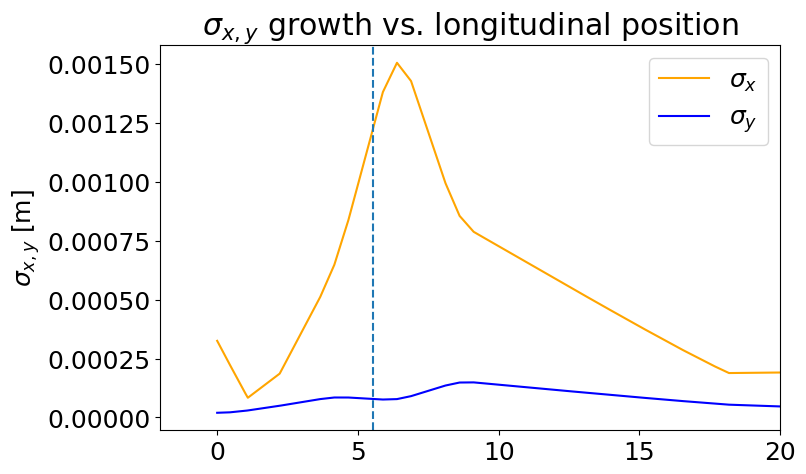

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
tw = line.twiss(method='4d') # RF cavities are not included in lattice so 'longitudinal motion is not stable'. Use 'method=4d' in this case. https://xsuite.readthedocs.io/en/latest/twiss.html#d-method-rf-off
# Beta functions
ax.plot(tw.s, np.sqrt(tw.betx * emit_x), label=r'$\sigma_x$',c='orange')
ax.plot(tw.s, np.sqrt(tw.bety * emit_y), label=r'$\sigma_y$', c='blue')
ax.legend()
ax.set_xlim(right=20)
ax.axvline(otr_loc, label='WDSOTR', ls='--')
# ax1.set_ylim(top=100, bottom=0)

ax.set_ylabel(r'$\sigma_{x,y}$ [m]')
ax.set_title(r'$\sigma_{x,y}$ growth vs. longitudinal position')

So yes, the beta functions make sense when visually compared to the $\sigma_x$ and $\sigma_y$ values in our previous outputs.

## How long would the drift have to be for our collided particles to be on the outside?

Right now we see that the centrally collided particles, though they on average have bigger transverse momentum shifts, are not located only in the halo. It's a bit of a bummer. However, since they on average do have larger px and py shifts, let's see if we can move the drift length to get those particles in the halo. How long should this drift be and does it actually distinguish between our collided and non-collided particles?